# <font color='#eb3483'> Logistic Regression Practice </font>

For this exercise we are going to use the heart dataset (heart.csv) to predict whether or not someone will get a heart attack (you can read more about the dataset here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

<font color='#eb3483'> Exercise: </font> Start by reading in the dataset from our data folder and having a look at the data.

In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

df = pd.read_csv("/Users/mollyrudisill/ix24_mollyr/ix_datascience-main/homework/data/heart.csv")
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,False
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,True
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,True
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,False
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,57,0,4,140,241,0,0,123,1,0.2,2,0.0,True
295,45,1,1,110,264,0,0,132,0,1.2,2,0.0,True
296,68,1,4,144,193,1,0,141,0,3.4,2,2.0,True
297,57,1,4,130,131,0,0,115,1,1.2,2,1.0,True


In [32]:
df.keys()

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'Y'],
      dtype='object')

In [34]:
df.nunique()

X1      41
X2       2
X3       4
X4      50
X5     152
X6       2
X7       3
X8      91
X9       2
X10     40
X11      3
X12      4
Y        2
dtype: int64

In [58]:
pd.Series(df["X6"]).value_counts(normalize=True).sort_index()

X6
0    0.852843
1    0.147157
Name: proportion, dtype: float64

In [35]:
pd.Series(df["X8"]).value_counts(normalize=True).sort_index()

X8
71     0.003344
88     0.003344
90     0.003344
95     0.003344
96     0.006689
         ...   
190    0.003344
192    0.003344
194    0.003344
195    0.003344
202    0.003344
Name: proportion, Length: 91, dtype: float64

<font color='#eb3483'> Exercise: </font> Now standardize the predictors.

In [59]:
X = df.drop(columns=['X6'])
y = df['X6']


In [60]:
print(X.shape)
X

(299, 12)


,X1,X2,X3,X4,X5,X7,X8,X9,X10,X11,X12,Y
0,63,1,1,145,233,2,150,0,2.3,3,0.0,False
1,67,1,4,160,286,2,108,1,1.5,2,3.0,True
2,67,1,4,120,229,2,129,1,2.6,2,2.0,True
3,37,1,3,130,250,0,187,0,3.5,3,0.0,False
4,41,0,2,130,204,2,172,0,1.4,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
294,57,0,4,140,241,0,123,1,0.2,2,0.0,True
295,45,1,1,110,264,0,132,0,1.2,2,0.0,True
296,68,1,4,144,193,0,141,0,3.4,2,2.0,True
297,57,1,4,130,131,0,115,1,1.2,2,1.0,True


In [61]:
print(y.shape)
y

(299,)


0      1
1      0
2      0
3      0
4      0
      ..
294    0
295    0
296    1
297    0
298    0
Name: X6, Length: 299, dtype: int64

<font color='#eb3483'> Exercise: </font> Fit a standard logistic regression model and determine which features look most promising.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('The training set has', X_train.shape[0], 'rows')
print('The test set has', X_test.shape[0], 'rows')

The training set has 239 rows
The test set has 60 rows


In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LogisticRegression
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [65]:
model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [66]:

import matplotlib.pyplot as plt

# Get the coefficients
coefficients = model.coef_[0]


In [67]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
y_prob = model.predict_proba(X_test)
y_prob[:10]

array([[0.85621536, 0.14378464],
       [0.87805572, 0.12194428],
       [0.74842993, 0.25157007],
       [0.93734302, 0.06265698],
       [0.88255835, 0.11744165],
       [0.96552029, 0.03447971],
       [0.89329859, 0.10670141],
       [0.9562565 , 0.0437435 ],
       [0.90791441, 0.09208559],
       [0.79359252, 0.20640748]])

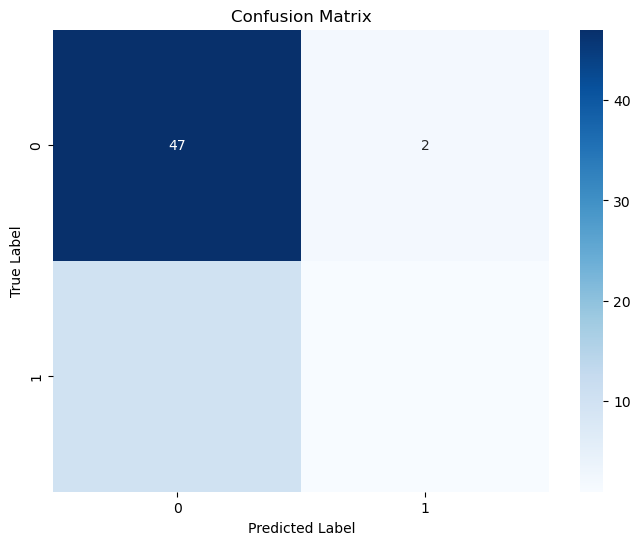

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [71]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.3333333333333333


In [72]:
recall = metrics.recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.09090909090909091


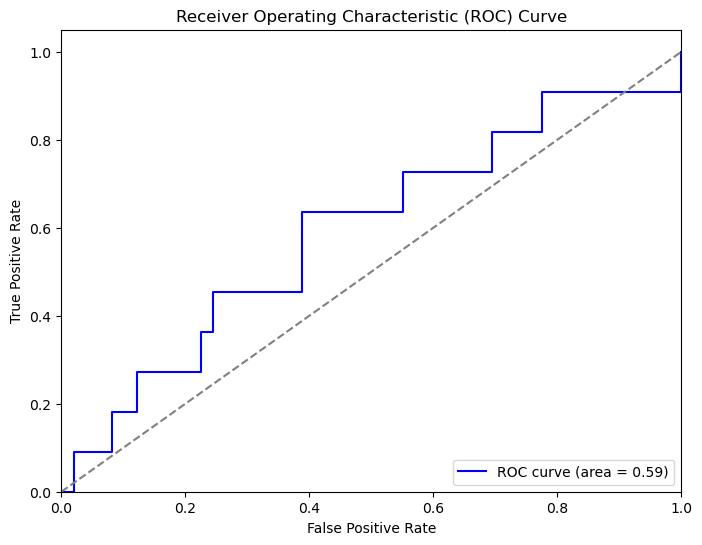

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
roc_auc

0.5918367346938775

<font color='#eb3483'> Exercise: </font> Fit another model that includes only the features that you think look promising. Use cross validation and the "roc_auc" scoring metric to determine which model is best.

In [ ]:
# Your code goes here!
# I RAN IT AGAIN